#  <font color = #00BFFF> Part 1: Import Libraries and Dataset </font> 

## <font color = #87CEFA> 1.1. Import Libraries </font>

In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from pandas import get_dummies
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import pickle

import warnings
warnings.filterwarnings('ignore')

## <font color = #87CEFA> 1.2. Import Dataset </font>

In [673]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#  <font color = #00BFFF> Part 2: Data Understanding </font> 

### The Iris flower dataset consists of three species: Setosa, Versicolor,and Virginica. These species can be distinguished based on their measurements.

![image.png](https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png)

### The dataset consists of:

* ### 150 samples
* ### 3 labels: species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor)
* ### 4 features: Sepal length, Sepal width, Petal length, Petal Width in cm

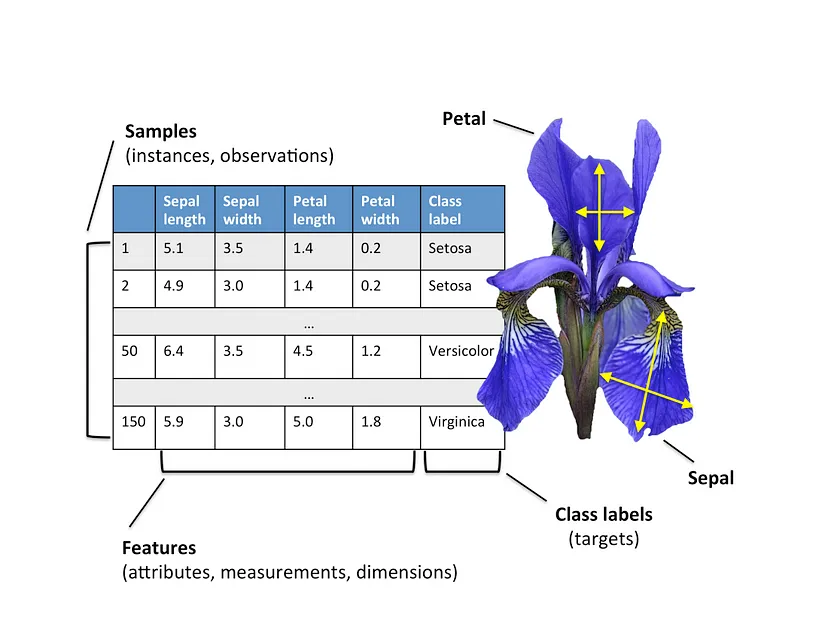

## <font color = #87CEFA> 2.1. Overview of the Data </font>

In [674]:
# Check the rows and columns
df.shape

(150, 6)

In [675]:
# Check general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [676]:
# Check for Duplicated values
duplicated_values = df.duplicated().sum()
print(f"Number of duplicates: {duplicated_values}")

Number of duplicates: 0


In [677]:
# Check for Missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [678]:
# Data Description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h2>  <font color = #87CEFA> 2.2. Outliers detection </font> </h2>

* ## Boxplots

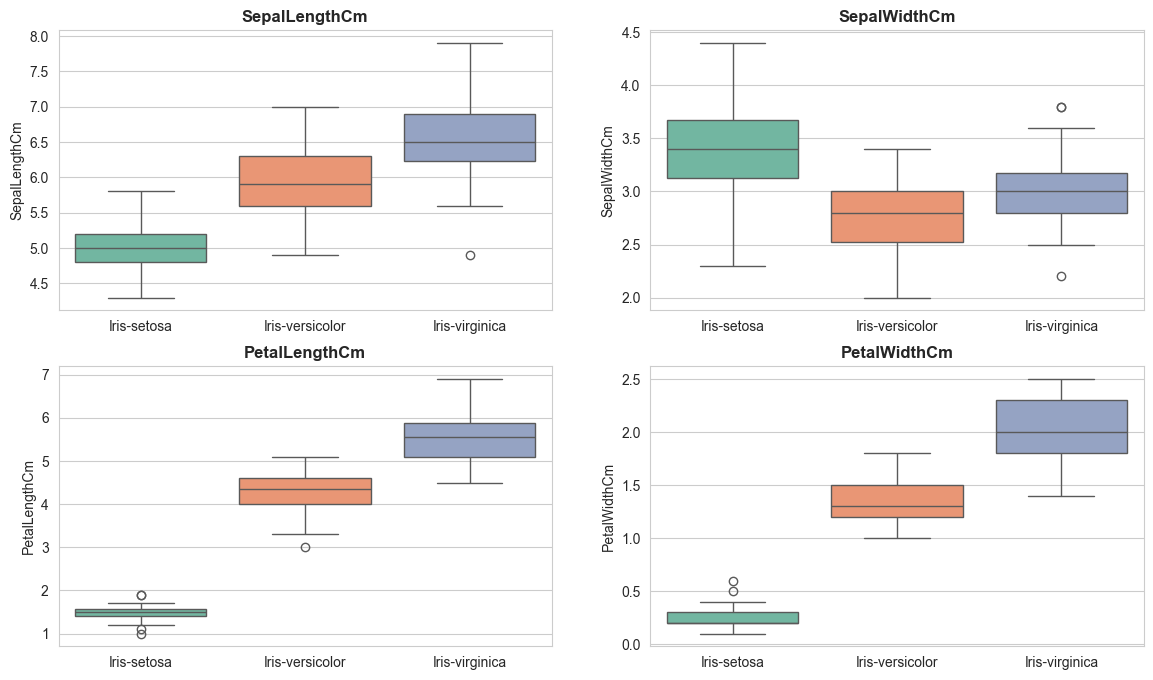

In [679]:
# boxplots
columns = df.drop(columns=['Id', 'Species']).columns

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(x=df['Species'], y=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xlabel('')

> #### The size of the `Iris-setosa` flower parts is significantly smaller than that of the other 2 Species. `Iris-virginica` as a whole has a larger Sepal and Petal size compared to `Iris-versicolor`, which can be used to distinguish these 2 species.

* ## Scatterplots

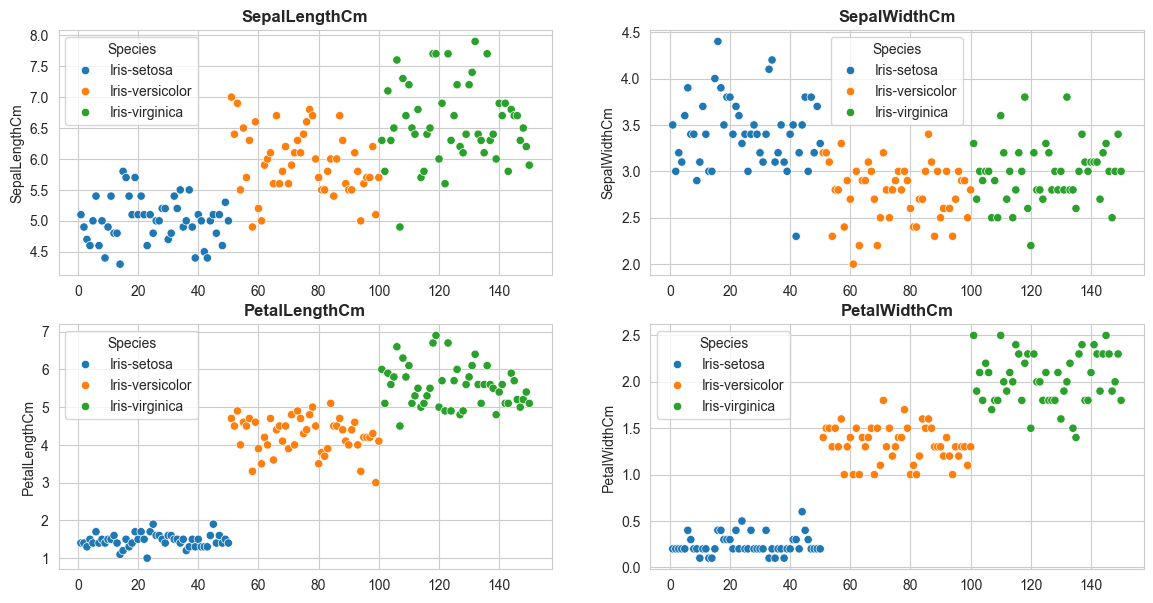

In [680]:
# scatterplots
columns = df.drop(columns=['Id', 'Species']).columns

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,7))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.scatterplot(x=df['Id'], y=df[col], hue=df['Species'], ax=axes[i])
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xlabel('')

> #### The sizes of Sepals and Petals vary significantly between Iris Species, with a clear separation of `Iris-setosa` from `Iris-versicolor` and `Iris-virginica`, especially in terms of Petals.

> ### Let's find outliers using 3-Sigma Method.

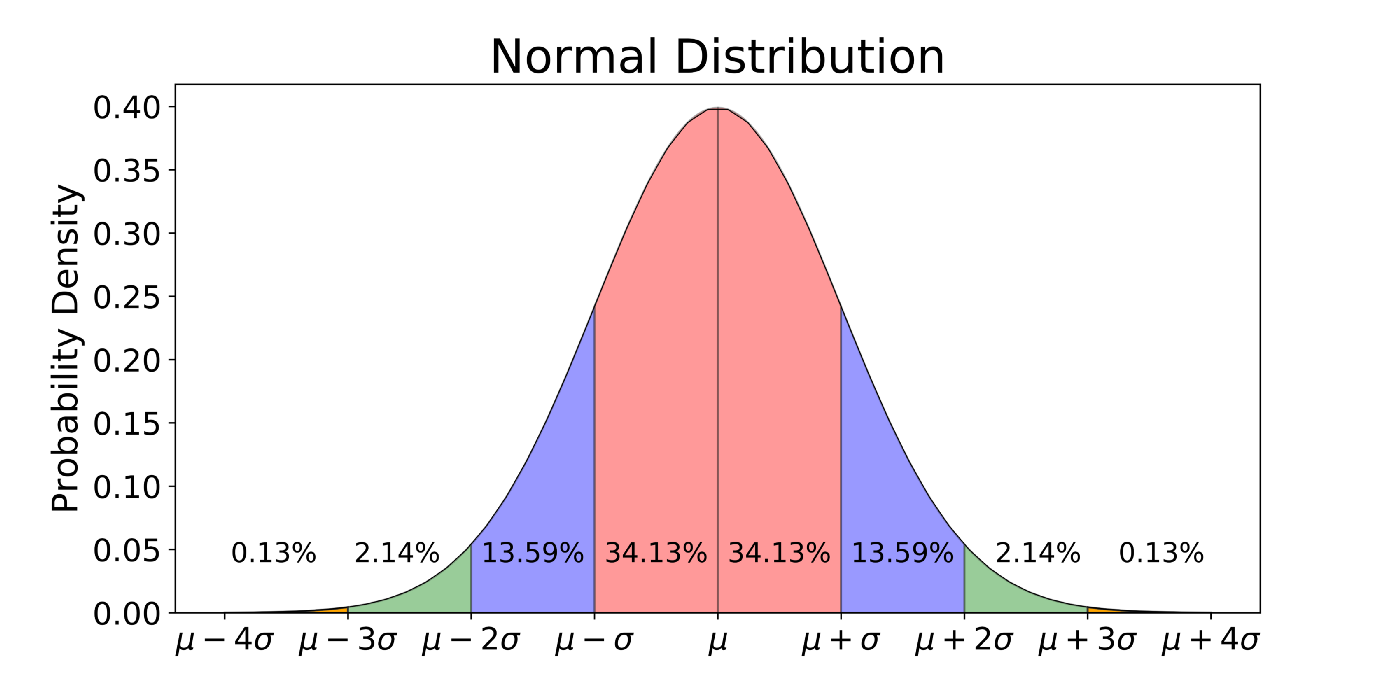

In [681]:
for column in df.columns[1:-1]:
    for species in df["Species"].unique():
        # select the required data
        species_data=df[df["Species"]== species]
        # select the required column
        selected_column=species_data[column]

        # compute mean and std
        mean = selected_column.mean()
        std = selected_column.std()
        # compute lower and upper bounds
        upper_lmt = mean + (3 * std) 
        lower_lmt= mean - (3 * std)

        # select outliers
        outliers=selected_column[((selected_column > upper_lmt) | (selected_column< lower_lmt))].index # pick outliers' indeces
        print(column, species, outliers)
        df.drop(index=outliers, inplace=True) # drop outliers

SepalLengthCm Iris-setosa Index([], dtype='int64')
SepalLengthCm Iris-versicolor Index([], dtype='int64')
SepalLengthCm Iris-virginica Index([], dtype='int64')
SepalWidthCm Iris-setosa Index([], dtype='int64')
SepalWidthCm Iris-versicolor Index([], dtype='int64')
SepalWidthCm Iris-virginica Index([], dtype='int64')
PetalLengthCm Iris-setosa Index([], dtype='int64')
PetalLengthCm Iris-versicolor Index([], dtype='int64')
PetalLengthCm Iris-virginica Index([], dtype='int64')
PetalWidthCm Iris-setosa Index([43], dtype='int64')
PetalWidthCm Iris-versicolor Index([], dtype='int64')
PetalWidthCm Iris-virginica Index([], dtype='int64')


> ### As we can see, this method found 1 outlier, we've already removed it. So, let's dive into EDA.

In [682]:
df.shape

(149, 6)

<h2>  <font color = #87CEFA> 2.3. Exploratory Data Analysis (EDA) </font> </h2>

* ## Distribution plots

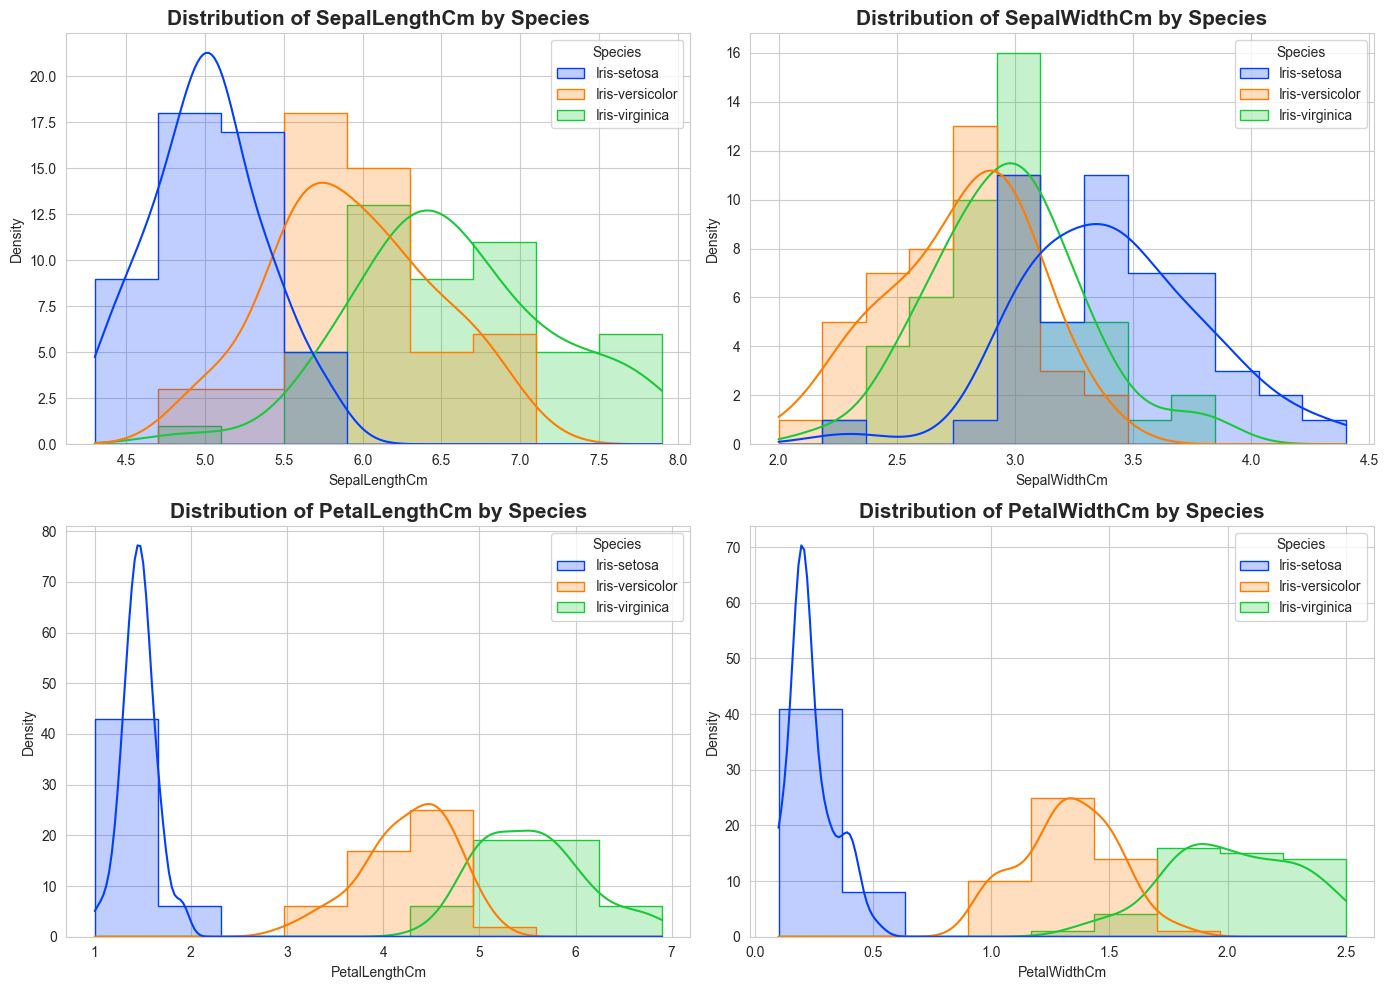

In [683]:
measurements = df.drop(columns=['Id', 'Species']).columns

_, axes = plt.subplots(2,2, figsize=(14,10))

for ax, measurement in zip(axes.flatten(), measurements):
    sns.histplot(data=df, x=measurement, hue='Species', kde=True, ax=ax, element='step', palette='bright')
    ax.set_title(f'Distribution of {measurement} by Species', fontsize=15, fontweight='bold')
    ax.set_ylabel('Density')
    # ax.set_xlabel('')

plt.tight_layout()
plt.show()

> #### `Iris-setosa` has shorter and wider Petals, while `Iris-virginica` and `Iris-versicolor` have longer and narrower Petals, which makes the size of the Petals an excellent criterion for distinguishing species.

* ## Pairplots

<Figure size 1000x500 with 0 Axes>

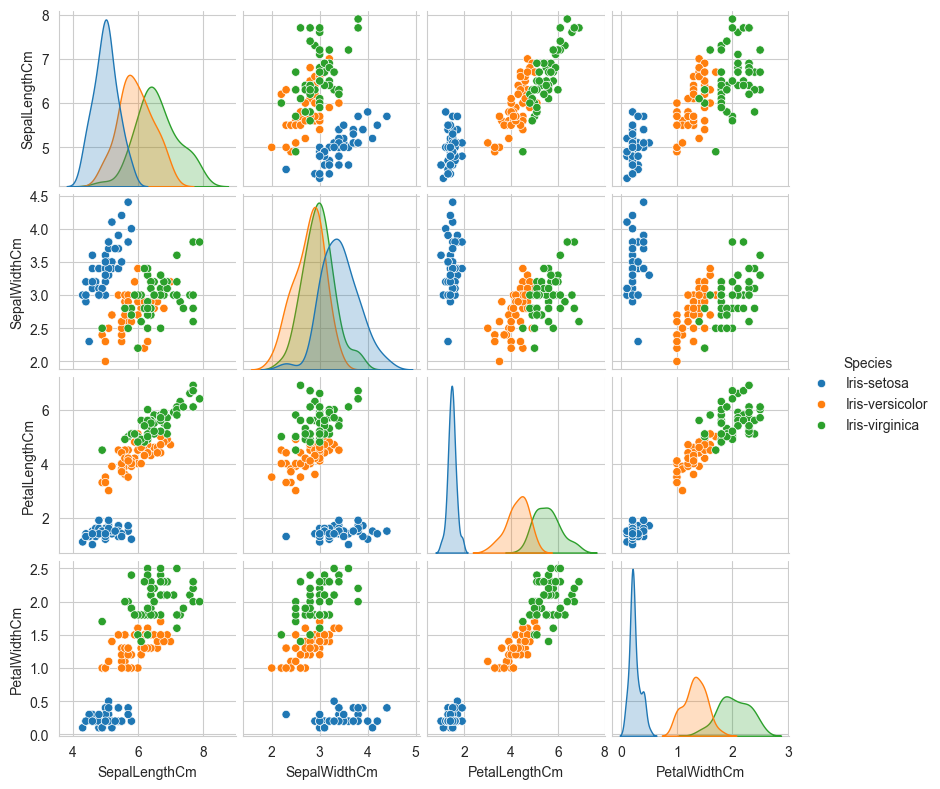

In [684]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.pairplot(df.drop(columns=['Id']),hue="Species",size=2)
plt.show()

> #### The size of the Petals (Length and Width) clearly separates the 3 types of Irises, while the size of the Sepals (Length and Width) have more intersections between the Species.

* ## Scatterplots

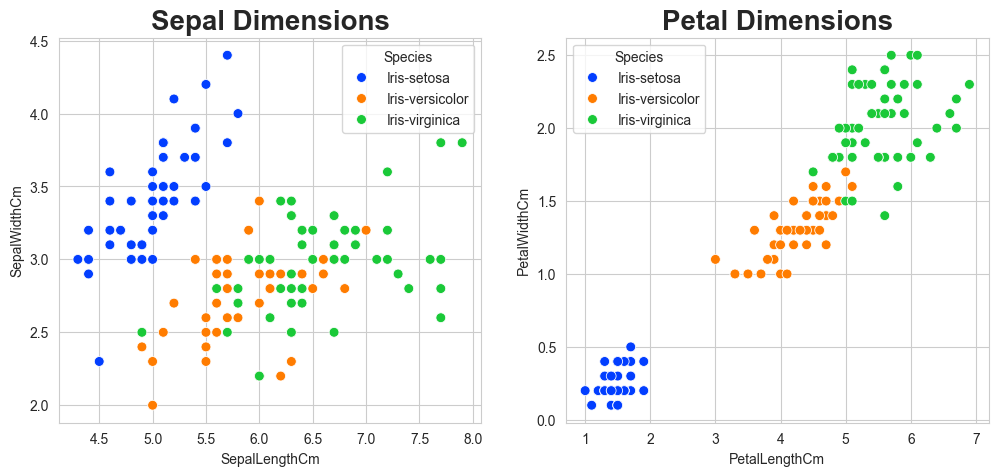

In [685]:
_, axes = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', s=50, palette='bright',  ax=axes[0])
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', s=50, palette='bright', ax=axes[1])
axes[0].set_title('Sepal Dimensions', fontsize=20, fontweight='bold')
axes[1].set_title('Petal Dimensions', fontsize=20, fontweight='bold')
plt.show()

> #### The sizes of the Petals clearly separate the 3 species of Irises, while the sizes of the Sepals overlap more significantly, especially between `Iris-versicolor` and `Iris-virginica`. This emphasizes that the Petals distinguish the types of Irises better than the Sepals.

* ## Lineplots

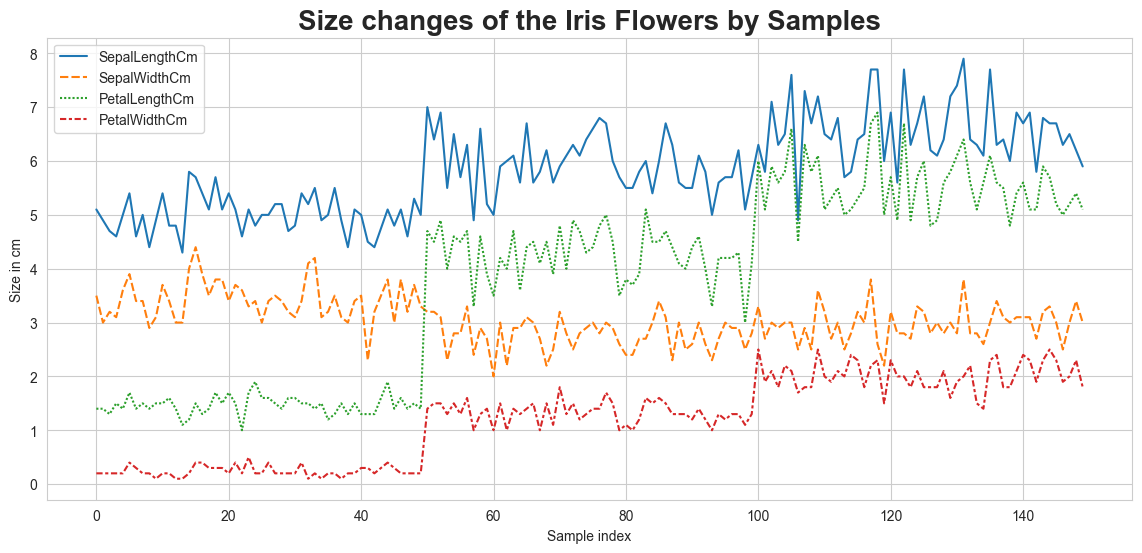

In [686]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df.drop(['Id','Species'], axis=1))
plt.title("Size changes of the Iris Flowers by Samples", fontsize=20, fontweight='bold')
plt.xlabel('Sample index')
plt.ylabel('Size in cm')
plt.show()

> #### The `SepaLength` is usually in the range from 4.3 to 7.9 cm.
> #### The `SepalWidth` is usually from 2 to 4.4 cm.
> #### The `PetalLength` (from 1 to 6.9 cm) and the `PetalWidth` (from 0.1 to 2.5) have larger amplitude of changes, especially noticeable in the middle of the data, which indicates differences between Species of Irises.

#  <font color = #00BFFF> Part 3: Modeling </font> 

<h2>  <font color = #87CEFA> 3.1. Data Preprocessing </font> </h2>

* ## Remove Id column

In [687]:
df.drop(columns=['Id'], inplace=True)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


* ## Train / test split

In [688]:
X_data = df.drop(columns=['Species'])
y_data = df['Species']

# train - 80% of data, test - 20% of data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=26)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 4), (30, 4), (119,), (30,))

In [689]:
y_train.value_counts()

Species
Iris-versicolor    42
Iris-setosa        39
Iris-virginica     38
Name: count, dtype: int64

In [690]:
y_test.value_counts()

Species
Iris-virginica     12
Iris-setosa        10
Iris-versicolor     8
Name: count, dtype: int64

> #### We can see, that the data is `uniformly` divided into train and test between 3 classes.

* ## Encoding

In [691]:
labelEncoder = LabelEncoder()

In [692]:
# encode
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

# transform to dataframe
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

y_train.head()

,0
0,1
1,2
2,2
3,0
4,0


<h2>  <font color = #87CEFA> 3.2. Modeling and Evaluation </font> </h2>

In [693]:
# Testing Different Models and selecting one on the basis of Accuracy Score 
models = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 3, 5]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': range(1,21)}),
    'SVM': (SVC(), {'C': [0.1, 1, 3, 5]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=26), {'max_depth': [-1, 5, 8, 10]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=26), {'n_estimators': [10, 50, 100], 'max_depth': [-1, 5, 10, 15]}),
}

model_results = {}

In [694]:
# Apply feature scaling within the cross-validation loop
for name, (model, params) in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1))
    ])

    # Use cross_val_score for cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_accuracy = cv_scores.mean()

    # Train on the entire train set and get the best model
    pipeline.fit(X_train, y_train)
    best_model = pipeline.named_steps['model'].best_estimator_

    # Score on the test set
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    model_results[name] = {
        'Cross-Validation Accuracy': mean_cv_accuracy,
        'Test Accuracy': test_accuracy,
        'Best Model': best_model
    }

    print(f"\nModel: {name}")
    print(f"Cross-Validation Mean Accuracy: {mean_cv_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Best Parameters: {best_model.get_params()}")

# Determine the best model based on test accuracy
best_model_name = max(model_results, key=lambda x: model_results[x]['Test Accuracy'])
best_model = model_results[best_model_name]['Best Model']

print(f"\nBest Model: {best_model_name} with Metrics: {model_results[best_model_name]}")


Model: LogisticRegression
Cross-Validation Mean Accuracy: 0.97
Test Accuracy: 0.93
Best Parameters: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Model: KNeighborsClassifier
Cross-Validation Mean Accuracy: 0.95
Test Accuracy: 0.93
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}

Model: SVM
Cross-Validation Mean Accuracy: 0.96
Test Accuracy: 0.97
Best Parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Model:

* ## Save best model and Predict

In [695]:
best_model

SVC(C=1)

In [696]:
# Save the model
save_path = r'D:\IT\Data_science\The Sparks Foundation\Iris_model.pkl'

with open(save_path, 'wb') as f:
    pickle.dump(best_model, f)

In [697]:
# Load the model
with open(save_path, 'rb') as f:
    model = pickle.load(f)

In [698]:
# Predict using loaded model
pred = model.predict([[4.6, 3.1, 1.5, 0.2]])
labelEncoder.inverse_transform(pred)

array(['Iris-virginica'], dtype=object)